## **70028 - Reinforcement Learning: Coursework 2**
### Belfiore Asia, cid: 02129867
---

In [1]:
# Track model number
# model_number = 1
model_number = 31

In [2]:
from utils import DQN, ReplayBuffer, greedy_action, epsilon_greedy, update_target, loss
from utils import train_net, visualise_net_results, print_hyperparameters, plot_return_by_episode

import torch
from torch import nn
import torch.nn.functional as F
import torch.optim as optim
import math
# import random # added import
import numpy as np # added import
import pandas as pd # added import

import gym
import matplotlib.pyplot as plt

In [7]:
# Reload function to apply any made changes
from importlib import reload
import utils
reload(utils)
from utils import visualise_net_results

In [13]:
model_number -= 1

Starting run 5 of 10
Starting run 10 of 10
Complete
Model saved.

DQN Hyperparameters:
A = 5 # size of each hidden layer
B = 2 # number of hidden layers,
C = 0.005 # learning rate
D = 60000 # size of Replay Buffer
E = 300 # number of training episodes
F = 0.3 # epsilon value for epsilon-greedy policy
DECAY_RATE = 0.995 # epsilon decay rate
G = 1 # reward discount factor
H = 1000 # size of replay sampled training batch
I = 50 # frequency (number of steps) of target network update
Saved figure at results/Q1/Adam/34-return.png


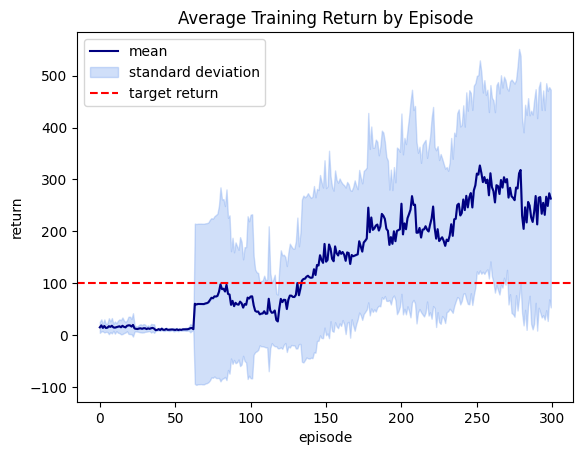

Printing policy
Saved figure at results/Q2/34/0.png


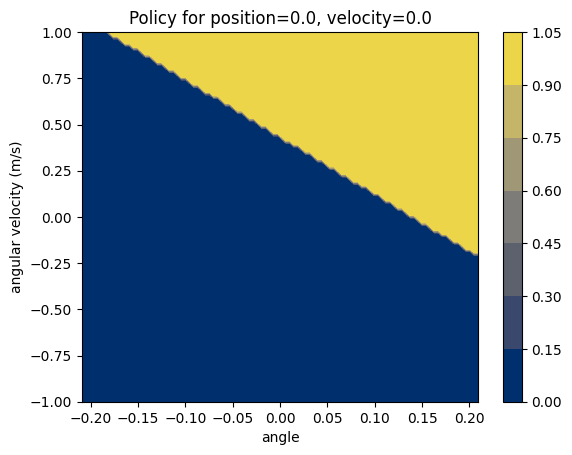

Saved figure at results/Q2/34/05.png


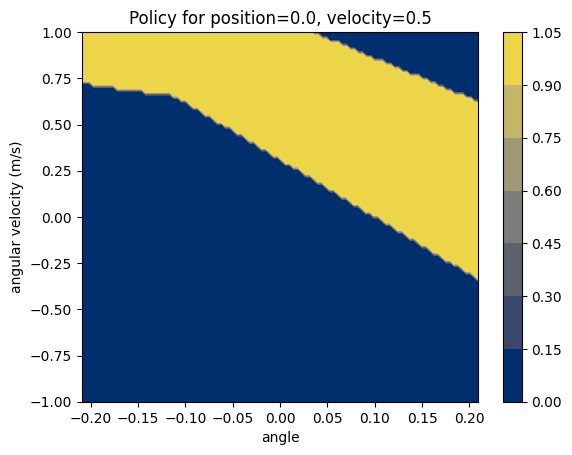

Saved figure at results/Q2/34/1.png


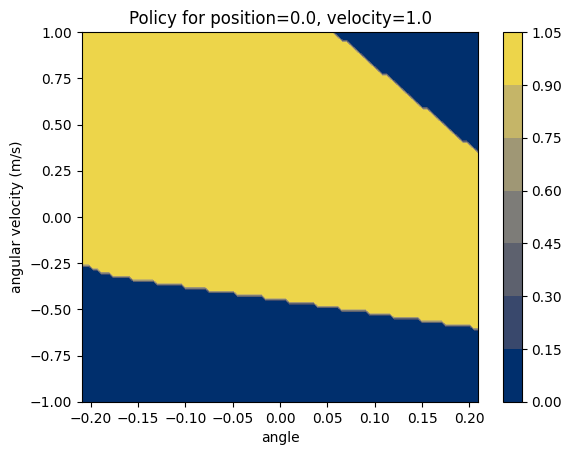

Saved figure at results/Q2/34/2.png


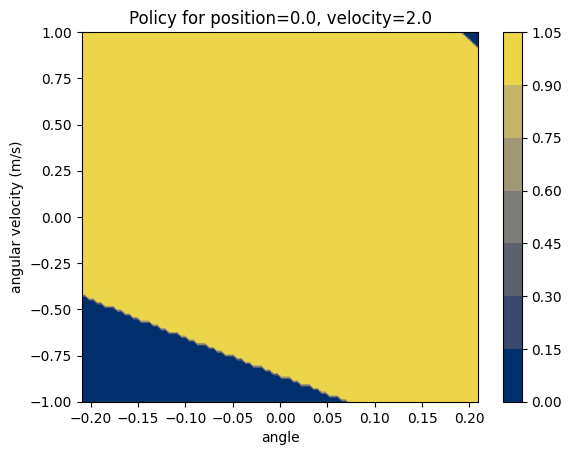

Printing Q values
Saved figure at results/Q2/34/q-0.png


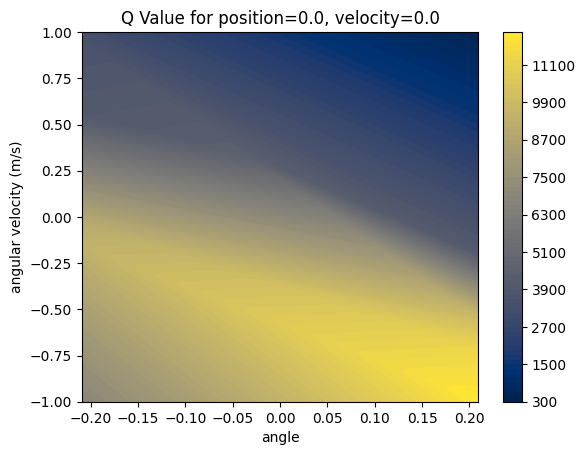

Saved figure at results/Q2/34/q-05.png


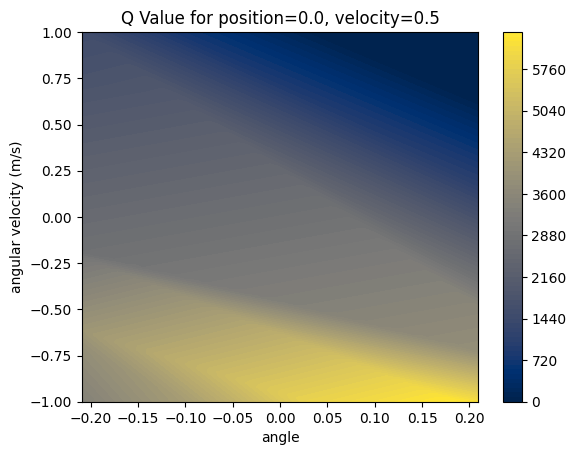

Saved figure at results/Q2/34/q-1.png


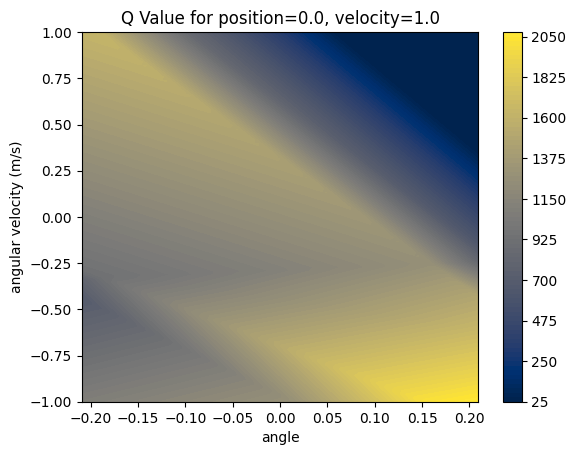

Saved figure at results/Q2/34/q-2.png


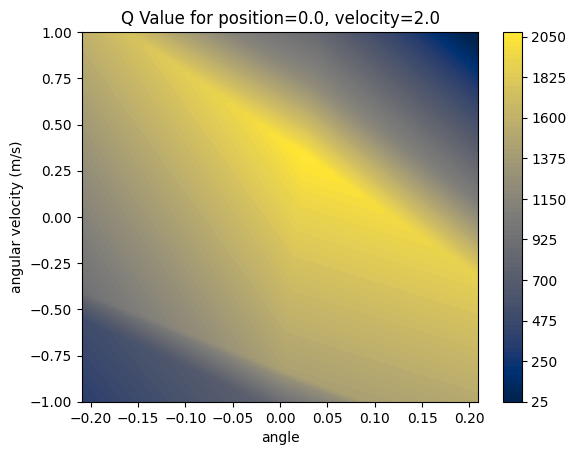

In [16]:
# Keep track of the model version
# model_number = 1
save_model = [True, "model/policy_net.pth"]
save_fig = True

# Set hyperparameters
NUM_RUNS = 10 # [OK]

A = 5 # [OK] size of each hidden layer
B = 2 # [OK] number of DQN hidden layers
C = 0.005 # [OK] learning rate
D = 60000 # [OK] size of Replay Buffer
E = 300 # [OK] number of training episodes (needs to stabilise for >50)
F = 0.3 # [OK] epsilon value for epsilon-greedy policy
G = 1 # [OK] reward discount
H = 1000 # size of replay sampled training batch
I = 50 # frequency (number of steps) of target network update

# Additional parameters
DECAY_RATE = 0.995 # [OK] epsilon decay rate
model_optim="Adam" # [OK] model optimizer

# Q1
# Train Model
runs_results = train_net(NUM_RUNS, A, B, C, D, E, F, G, H, I, decay=DECAY_RATE, model_optim=model_optim, save=save_model)
# Plot the learning curve (mean and standard deviation of return 
# throughout training over NUM_RUNS many runs)
print_hyperparameters(A, B, C, D, E, F, G, H, I, DECAY_RATE)
plot_return_by_episode(runs_results, save=[save_fig, "Adam", model_number])

# Q2
# Visualise Greedy Policy and Q-values for the cart according to the "policy_net" network
# as a 2D plot function of pole angle and angular velocity.
net = torch.load(save_model[1], weights_only=False) # load DQN
net.eval()

# Fix the cart position to the centre of the track (position=0) 
# and test cart velocities of 0., 0.5, 1. and 2.
velocities = [0., 0.5, 1., 2.]

for q in [False, True]:  # whether q values or greedy policy is visualised
    if q: print("Printing Q values")
    else: print("Printing policy")
    for velocity in velocities:
        visualise_net_results(net=net, position=0., velocity=velocity, q=q, save=[save_fig, model_number])

model_number += 1